In [1]:
import numpy as np
import matplotlib.pyplot as plt

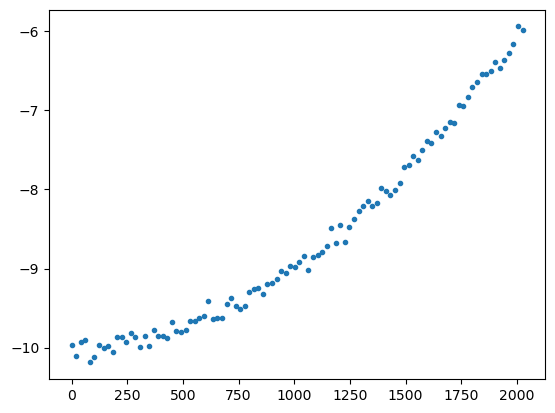

In [2]:
N = 100
x = np.linspace(0, 2025, N)

a = 0.000001 # C/ano²
b = 0.000002 # C/ano
c = -10 # C

temperatura_obs = a*x**2 + b*x + c
noise = np.random.default_rng(42).normal(0,0.1, N)

temperatura_obs += noise

plt.plot(x, temperatura_obs, ".")

# Inversão 

In [3]:
GRAU = 2
M = GRAU + 1
jacobiana = np.empty((N, M))

for j in range(M):
    jacobiana[:, j] = x**(GRAU-j)
jacobiana

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.18388430e+02, 2.04545455e+01, 1.00000000e+00],
       [1.67355372e+03, 4.09090909e+01, 1.00000000e+00],
       [3.76549587e+03, 6.13636364e+01, 1.00000000e+00],
       [6.69421488e+03, 8.18181818e+01, 1.00000000e+00],
       [1.04597107e+04, 1.02272727e+02, 1.00000000e+00],
       [1.50619835e+04, 1.22727273e+02, 1.00000000e+00],
       [2.05010331e+04, 1.43181818e+02, 1.00000000e+00],
       [2.67768595e+04, 1.63636364e+02, 1.00000000e+00],
       [3.38894628e+04, 1.84090909e+02, 1.00000000e+00],
       [4.18388430e+04, 2.04545455e+02, 1.00000000e+00],
       [5.06250000e+04, 2.25000000e+02, 1.00000000e+00],
       [6.02479339e+04, 2.45454545e+02, 1.00000000e+00],
       [7.07076446e+04, 2.65909091e+02, 1.00000000e+00],
       [8.20041322e+04, 2.86363636e+02, 1.00000000e+00],
       [9.41373967e+04, 3.06818182e+02, 1.00000000e+00],
       [1.07107438e+05, 3.27272727e+02, 1.00000000e+00],
       [1.20914256e+05, 3.47727

In [4]:
p = np.linalg.solve(jacobiana.T@jacobiana, jacobiana.T@temperatura_obs)
p

array([ 9.51206490e-07,  8.00894076e-05, -1.00170610e+01])

In [5]:
print(a,b,c)

1e-06 2e-06 -10


# Ajuste

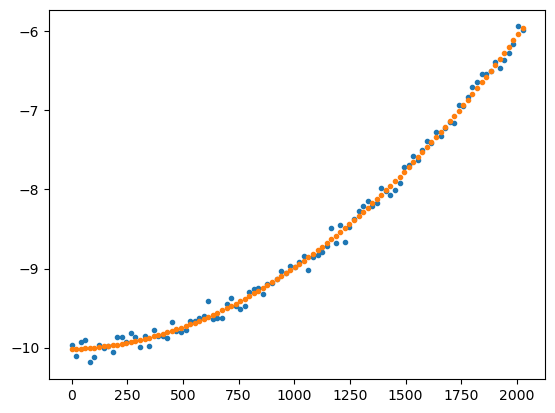

In [8]:
temperatura_pred = jacobiana@ p

plt.plot(x, temperatura_obs, ".")
plt.plot(x, temperatura_pred, ".")

In [11]:
residuos = temperatura_obs - temperatura_pred
ajuste = np.linalg.norm(residuos)**2 # C²
ajuste

np.float64(0.559090298899158)

In [12]:
RMS = np.linalg.norm(residuos) # root-mean square error | C
RMS

np.float64(0.7477234106935251)

In [ ]:
plt.hist(residuos)